In [6]:
# Import packages and read-in files

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os

# Read in files using the explicitly defined base path
ch_0_conversion_rates = pd.read_csv('channel_0_conversion_rates.csv')
ch_0_schedule = pd.read_csv('channel_0_schedule.csv')
ch_1_conversion_rates = pd.read_csv('channel_1_conversion_rates.csv')
ch_1_schedule = pd.read_csv('channel_1_schedule.csv')
ch_2_conversion_rates = pd.read_csv('channel_2_conversion_rates.csv')
ch_2_schedule = pd.read_csv('channel_2_schedule.csv')
ch_A_schedule = pd.read_csv('channel_A_schedule.csv')
movies_df = pd.read_csv('movie_database.csv')

movies_df.head()


,title,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,genres,n_ad_breaks,runtime_with_ads,scaled_popularity,children_scaled_popularity,adults_scaled_popularity,retirees_scaled_popularity
0,Inception,8.364,34495,2010-07-15,825532764,148,160000000,83.952,"['Action', 'Science Fiction', 'Adventure']",5,180.0,0.972027,0.777622,0.972027,0.388811
1,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,140.241,"['Adventure', 'Drama', 'Science Fiction']",6,210.0,1.000000,0.600000,1.000000,0.600000
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,130.643,"['Drama', 'Action', 'Crime', 'Thriller']",6,180.0,1.000000,0.600000,1.000000,0.800000
3,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,79.932,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",6,180.0,0.958199,0.766559,0.958199,0.383280
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,98.082,"['Science Fiction', 'Action', 'Adventure']",5,180.0,1.000000,0.800000,1.000000,0.400000


In [3]:
movies_df.head()
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])


movies_df['year'] = movies_df['release_date'].dt.year

age_groups = ['children_scaled_popularity', 'adults_scaled_popularity', 'retirees_scaled_popularity']

year_counts = movies_df['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']


yearly_sums = pd.DataFrame()

for age_group in age_groups:
    summed_data = movies_df.groupby('year')[age_groups].sum().reset_index()

    if yearly_sums.empty:
        yearly_sums['year'] = summed_data['year']

    yearly_sums[age_groups] = summed_data[age_groups]


age_groups = ['children_scaled_popularity', 'adults_scaled_popularity', 'retirees_scaled_popularity']

grouped = movies_df.groupby('year').agg({**{col: 'sum' for col in age_groups}, 'release_date': 'count'}).reset_index()
grouped.rename(columns={'release_date': 'movie_count'}, inplace=True)

for age_group in age_groups:
    grouped[f'avg_{age_group}'] = grouped[age_group] / grouped['movie_count']

yearly_averages = grouped[['year'] + [f'avg_{age_group}' for age_group in age_groups]]

grouped.head(75)

# plot by number of movies
# plot by age group popularity
# by year
# runtime against popularity of ea





,year,children_scaled_popularity,adults_scaled_popularity,retirees_scaled_popularity,movie_count,avg_children_scaled_popularity,avg_adults_scaled_popularity,avg_retirees_scaled_popularity
0,1950,1.400159,2.163760,1.831799,6,0.233360,0.360627,0.305300
1,1951,2.371164,3.830179,3.218766,13,0.182397,0.294629,0.247597
2,1952,2.099704,2.983166,2.911706,8,0.262463,0.372896,0.363963
3,1953,2.564184,4.106746,3.691356,13,0.197245,0.315904,0.283950
4,1954,1.861164,3.253192,3.080559,8,0.232645,0.406649,0.385070
...,...,...,...,...,...,...,...,...
69,2019,49.761922,67.438235,49.337048,136,0.365896,0.495869,0.362772
70,2020,21.254864,26.328460,18.418626,54,0.393609,0.487564,0.341086
71,2021,39.665048,53.922813,35.610464,84,0.472203,0.641938,0.423934
72,2022,44.005758,60.288179,42.242546,86,0.511695,0.701025,0.491192


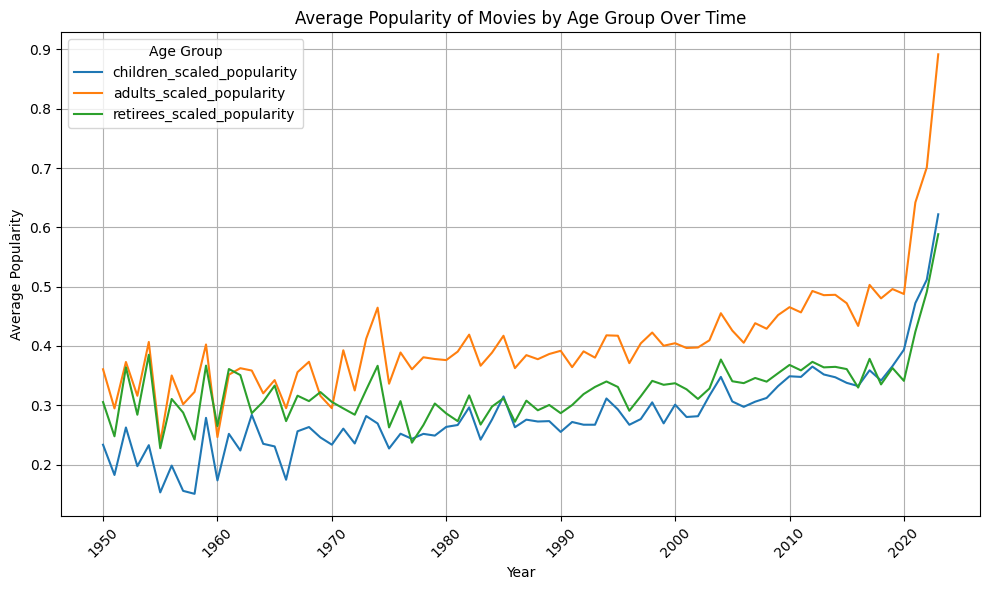

,title,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,genres,n_ad_breaks,runtime_with_ads,scaled_popularity,children_scaled_popularity,adults_scaled_popularity,retirees_scaled_popularity,year
0,Inception,8.364,34495,2010-07-15,825532764,148,160000000,83.952,Action,5,180.0,0.972027,0.777622,0.972027,0.388811,2010
1,Inception,8.364,34495,2010-07-15,825532764,148,160000000,83.952,Science Fiction,5,180.0,0.972027,0.777622,0.972027,0.388811,2010
2,Inception,8.364,34495,2010-07-15,825532764,148,160000000,83.952,Adventure,5,180.0,0.972027,0.777622,0.972027,0.388811,2010
3,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,140.241,Adventure,6,210.0,1.000000,0.600000,1.000000,0.600000,2014
4,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,140.241,Drama,6,210.0,1.000000,0.600000,1.000000,0.600000,2014


In [4]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for age_group in age_groups:
    plt.plot(grouped['year'], grouped[f'avg_{age_group}'], label=age_group)

plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Movies by Age Group Over Time')
plt.legend(title='Age Group')

plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


movies_df['genres'] = movies_df['genres'].apply(
        lambda x: x.strip("[]").replace("'","").split(', ') if isinstance(x, str) else x
)

genre = movies_df['genres']
movies_df_exploded = movies_df.explode('genres', ignore_index=True)

movies_df_exploded.head()





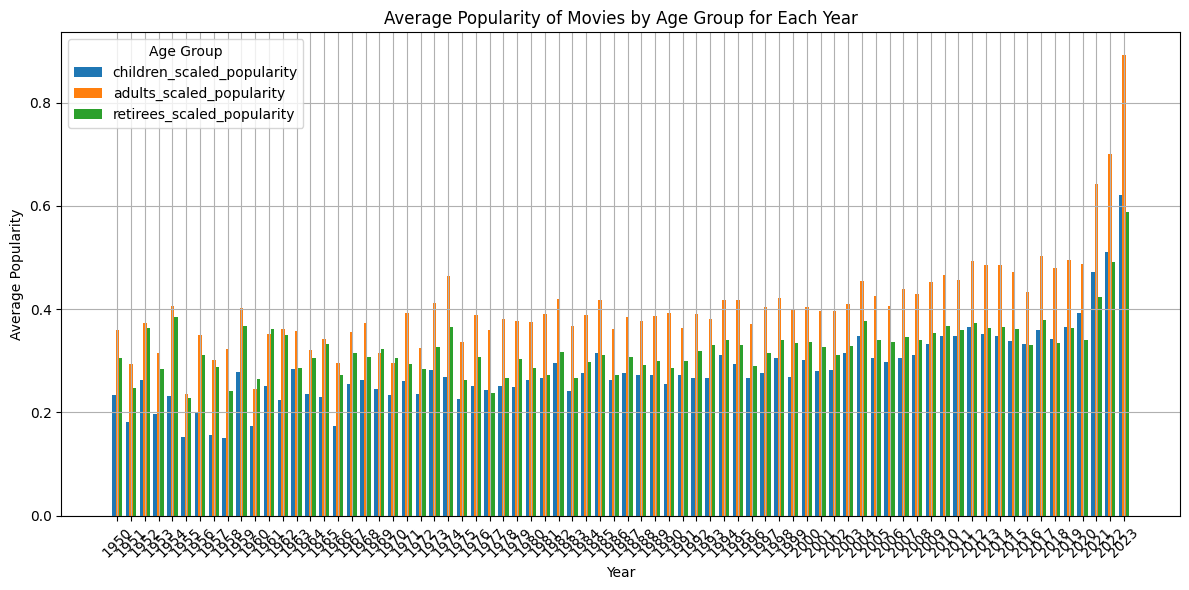

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(grouped['year']))  # The position of each year on the x-axis

# Create the plot
plt.figure(figsize=(12, 6))

# Plot bars for each age group
for i, age_group in enumerate(age_groups):
    plt.bar(index + i * bar_width, grouped[f'avg_{age_group}'], 
            bar_width, label=age_group)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Movies by Age Group for Each Year')

# Customize the x-axis to show years and add a legend
plt.xticks(index + bar_width, grouped['year'], rotation=45)
plt.legend(title='Age Group')

# Display gridlines
plt.grid(True)

# Tight layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()

